<h2>SQL CLASS</h2>

<figure>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdQ0mU7Mx11Fwy7h91WYMCUWGjJWlk562TG0pFftVgCYlQRcVWz1qqmpcnNQ&s" alt='SQL Logo'>
    <figcaption>SQL Class</figcaption>
</figure>

In [2]:
# import libraries
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Check for drivers
pyodbc.drivers()

['SQL Server',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [4]:
# Establish connection
connection = pyodbc.connect('Driver={SQL Server};' 'Server=DESKTOP-6F66SDS\SQLEXPRESS;' 'Database=Tutorials;' 'Trusted_connection=yes;')

In [5]:
# Load SQL command
SQL_QUERY = 'SELECT SI.studentid, firstName, LastName, Age, Gender, Score, Average, Grade, Comment FROM dbo.StudentInfo SI JOIN dbo.StudentResult AS SR ON SI.studentid = SR.Studentid'

In [6]:
# Read data
df = pd.read_sql(SQL_QUERY, con=connection)

In [7]:
df.head()

,studentid,firstName,LastName,Age,Gender,Score,Average,Grade,Comment
0,101,Jacobson,Koryele,23,Male,87,82.3,A,Excellent
1,102,Mark,Henry,45,Male,77,74.5,B,Very Good
2,103,Blue,Kamsi,22,Female,82,81.4,A,Excellent
3,104,Chris,Sam,24,Male,90,89.9,A,Excellent
4,105,Kamanu,Timothy,34,Male,85,82.7,A,Excellent


In [8]:
# Get info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studentid  11 non-null     int64  
 1   firstName  11 non-null     object 
 2   LastName   11 non-null     object 
 3   Age        11 non-null     int64  
 4   Gender     11 non-null     object 
 5   Score      11 non-null     int64  
 6   Average    11 non-null     float64
 7   Grade      11 non-null     object 
 8   Comment    11 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 924.0+ bytes


In [9]:
# Check for missing data
df.isnull().sum()

studentid    0
firstName    0
LastName     0
Age          0
Gender       0
Score        0
Average      0
Grade        0
Comment      0
dtype: int64

In [10]:
# Gender Count
df['Gender'].value_counts()

Gender
Male      6
Female    5
Name: count, dtype: int64

In [11]:
# Crosstab of Gender and Grade
pd.crosstab(df['Gender'], df['Grade'])

Grade,A,B,C
Gender,,,
Female,1,2,2
Male,4,1,1


In [12]:
# Pivot table
pd.pivot_table(df, index='Gender', values=['Average', 'Score'], columns='Grade', aggfunc=sum)

Average               Score          
Grade        A      B      C     A    B    C
Gender                                      
Female    81.4  150.8  130.4    82  152  131
Male     337.2   74.5   66.3   349   77   65

In [14]:
#Statistical Overview
df.describe().T

,count,mean,std,min,25%,50%,75%,max
studentid,11.0,105.090909,3.176619,101.0,102.50,105.0,107.5,110.0
Age,11.0,31.727273,13.107943,21.0,23.00,29.0,33.0,65.0
Score,11.0,77.818182,9.765431,60.0,71.50,80.0,86.0,90.0
Average,11.0,76.418182,8.664620,60.9,70.25,79.8,82.3,89.9


In [15]:
# grouping data
df.groupby('Gender')[['Score', 'Average']].mean()

,Score,Average
Gender,,
Female,73.000000,72.520000
Male,81.833333,79.666667


In [16]:
# shape of data
df.shape

(11, 9)

In [17]:
# Get max value for score
df['Score'].max()

90

In [18]:
# Get min value for score
df['Score'].min()

60

In [20]:
# Index of max and min value
df['Average'].idxmax(), df['Average'].idxmin()

(3, 8)

In [24]:
#Select columns based on index
df.iloc[[2,3,6],[2,4,7]]

,LastName,Gender,Grade
2,Kamsi,Female,A
3,Sam,Male,A
6,Jay,Female,B


In [32]:
df.groupby('Grade')[['Average', 'Score']].value_counts()

Grade  Average  Score
A      82.3     87       2
       81.4     82       1
       82.7     85       1
       89.9     90       1
B      71.0     72       1
       74.5     77       1
       79.8     80       1
C      60.9     60       1
       66.3     65       1
       69.5     71       1
Name: count, dtype: int64

In [36]:
#[low, high] = df['Average'].between(.1,.9)
#df.quantile(low, high)

In [ ]:
df['']

<h2>Visualisation</h2>

Text(0.5, 1.0, 'Gender Vs Average')

<Figure size 300x400 with 0 Axes>

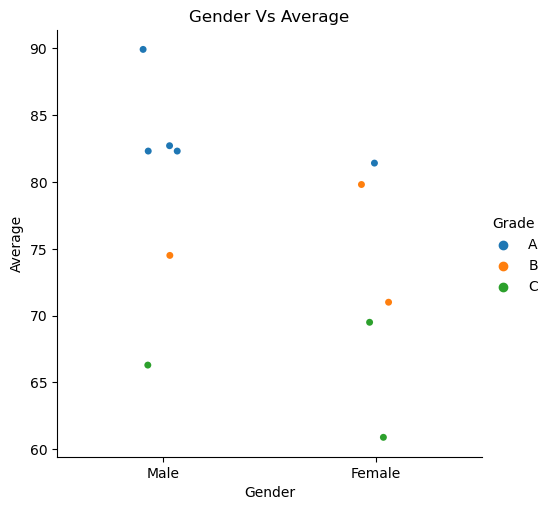

In [25]:
fig = plt.figure(figsize=[3,4])
sb.catplot(data=df, x='Gender', y='Average', hue='Grade')
plt.xlabel('Gender')
plt.ylabel('Average')
plt.title('Gender Vs Average')

Text(0.5, 1.0, 'Score Vs Average')

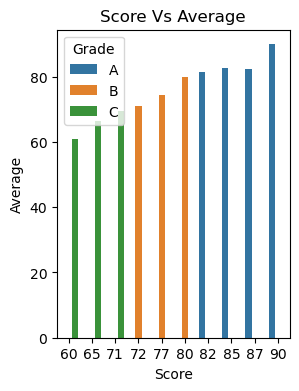

In [26]:
fig = plt.figure(figsize=[3,4])
sb.barplot(data=df, x='Score', y='Average', hue='Grade')
plt.xlabel('Score')
plt.ylabel('Average')
plt.title('Score Vs Average')

Text(0.5, 1.0, 'Age Vs Average')

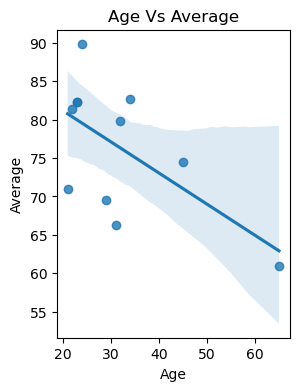

In [30]:
fig = plt.figure(figsize=[3,4])
sb.regplot(data=df, x='Age', y='Average')
plt.xlabel('Age')
plt.ylabel('Average')
plt.title('Age Vs Average')

Text(0.5, 1.0, 'Age Vs Average')

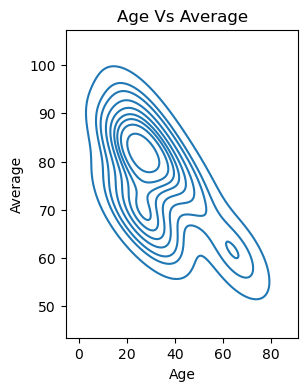

In [31]:
fig = plt.figure(figsize=[3,4])
sb.kdeplot(data=df, x='Age', y='Average')
plt.xlabel('Age')
plt.ylabel('Average')
plt.title('Age Vs Average')

In [38]:
df.to_excel('sample.xlsx')

In [43]:
df.sample(n=4, random_state=10)

,studentid,firstName,LastName,Age,Gender,Score,Average,Grade,Comment
2,103,Blue,Kamsi,22,Female,82,81.4,A,Excellent
6,107,Flora,Jay,32,Female,80,79.8,B,Very Good
8,109,Remi,Oluwa,65,Female,60,60.9,C,God
5,106,Victoria,Jay,21,Female,72,71.0,B,Very Good
